In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = [
    
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


Save these seeds if you want to rerun a scenario
[5, 5348, 8388]
run with seed 5:
run with seed 5348:
run with seed 8388:
using average of time series:
stats on susceptible:
data: [0.2186, 0.4083416666666667, 0.14534999999999998]
min:
0.14534999999999998
max:
0.4083416666666667
std:
0.11082121703474355
mean:
0.25743055555555555
median:
0.2186
95% confidence interval for the mean:
(-0.07973578529504516,0.5945968964061563)
using average of time series:
stats on infected:
data: [0.05780833333333332, 0.04375277777777778, 0.057383333333333335]
min:
0.04375277777777778
max:
0.05780833333333332
std:
0.006527985155623736
mean:
0.052981481481481484
median:
0.057383333333333335
95% confidence interval for the mean:
(0.03312051147103075,0.07284245149193222)
using average of time series:
stats on recovered:
data: [0.6892944444444444, 0.5308805555555556, 0.7642250000000002]
min:
0.5308805555555556
max:
0.7642250000000002
std:
0.09727348508306757
mean:
0.6614666666666668
median:
0.6892944444444444
9

(<function dict.items>, <function dict.items>, <function dict.items>)

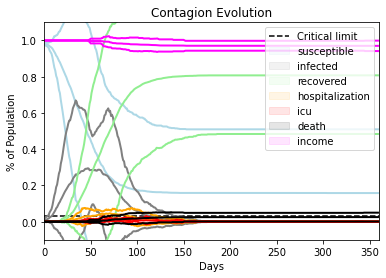

In [11]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)

seeds = [5, 5348, 8388]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong0", do_print = True, listeners = listeners)

 Locality slows down the spread, with parameters home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3

Save these seeds if you want to rerun a scenario
[5, 5348, 8388]
run with seed 5:
run with seed 5348:
run with seed 8388:
using average of time series:
stats on susceptible:
data: [0.2165639915639916, 0.2211138888888889, 0.2293083333333333]
min:
0.2165639915639916
max:
0.2293083333333333
std:
0.005273294695960241
mean:
0.22232873792873795
median:
0.2211138888888889
95% confidence interval for the mean:
(0.20628508198958342,0.23837239386789247)
using average of time series:
stats on infected:
data: [0.05616883116883118, 0.05478333333333334, 0.05344444444444445]
min:
0.05344444444444445
max:
0.05616883116883118
std:
0.0011122804768669342
mean:
0.05479886964886965
median:
0.05478333333333334
95% confidence interval for the mean:
(0.05141482868253365,0.058182910615205655)
using average of time series:
stats on recovered:
data: [0.6969918969918969, 0.6873500000000001, 0.6950222222222221]
min:
0.6873500000000001
max:
0.6969918969918969
std:
0.004159444275485182
mean:
0.693121373071373
median

(<function dict.items>, <function dict.items>, <function dict.items>)

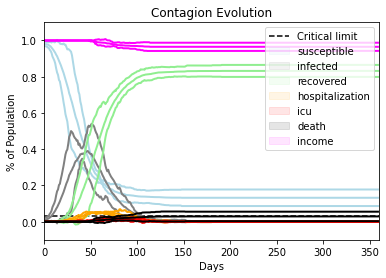

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds =[5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong1", do_print = True, 
              listeners = listeners, home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3)

In [6]:
listeners = [
    
]

Save these seeds if you want to rerun a scenario
[5, 5348, 8388]
run with seed 5:
run with seed 5348:
run with seed 8388:
using average of time series:
stats on susceptible:
data: [0.3872433122433122, 0.22979166666666664, 0.24992245485764925]
min:
0.22979166666666664
max:
0.3872433122433122
std:
0.06996291652735073
mean:
0.288985811255876
median:
0.24992245485764925
95% confidence interval for the mean:
(0.07612819073933333,0.5018434317724187)
using average of time series:
stats on infected:
data: [0.048426573426573416, 0.05623333333333333, 0.05319596765259776]
min:
0.048426573426573416
max:
0.05623333333333333
std:
0.0032131364359374377
mean:
0.05261862480416817
median:
0.05319596765259776
95% confidence interval for the mean:
(0.04284286630100066,0.06239438330733568)
using average of time series:
stats on recovered:
data: [0.5444111444111445, 0.6947694444444443, 0.6716766367563974]
min:
0.5444111444111445
max:
0.6947694444444443
std:
0.06611219562876142
mean:
0.6369524085373288
media

(<function dict.items>, <function dict.items>, <function dict.items>)

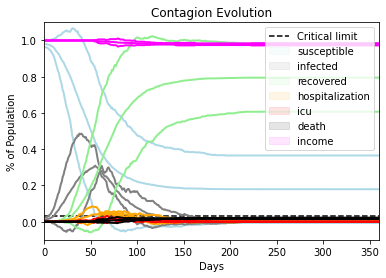

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong2", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =2, school_height=2, school_width=1)

Save these seeds if you want to rerun a scenario
[5, 5348, 8388]
run with seed 5:
run with seed 5348:
run with seed 8388:
using average of time series:
stats on susceptible:
data: [0.3515484515484516, 0.4252888888888888, 0.3738317238317238]
min:
0.3515484515484516
max:
0.4252888888888888
std:
0.030879759927337016
mean:
0.38355635475635474
median:
0.3738317238317238
95% confidence interval for the mean:
(0.2896066947577546,0.4775060147549549)
using average of time series:
stats on infected:
data: [0.0497002997002997, 0.04637222222222222, 0.04928959928959929]
min:
0.04637222222222222
max:
0.0497002997002997
std:
0.001481585617606792
mean:
0.04845404040404041
median:
0.04928959928959929
95% confidence interval for the mean:
(0.04394641258049153,0.05296166822758929)
using average of time series:
stats on recovered:
data: [0.5806360306360305, 0.5079527777777778, 0.5627289377289377]
min:
0.5079527777777778
max:
0.5806360306360305
std:
0.030919154296029316
mean:
0.5504392487142488
median:
0.5

(<function dict.items>, <function dict.items>, <function dict.items>)

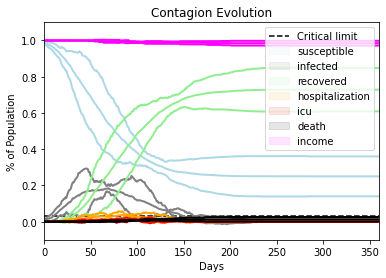

In [12]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong3", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =1, school_height=1, school_width=1)

Save these seeds if you want to rerun a scenario
[5, 5348, 8388]
run with seed 5:
run with seed 5348:
run with seed 8388:
using average of time series:
stats on susceptible:
data: [0.8979527777777777, 0.9141027777777779, 0.9568444444444443]
min:
0.8979527777777777
max:
0.9568444444444443
std:
0.024845972113139585
mean:
0.9229666666666666
median:
0.9141027777777779
95% confidence interval for the mean:
(0.847374413428399,0.9985589199049342)
using average of time series:
stats on infected:
data: [0.007258333333333334, 0.005244444444444445, 0.0022166666666666667]
min:
0.0022166666666666667
max:
0.007258333333333334
std:
0.002072078653220074
mean:
0.004906481481481482
median:
0.005244444444444445
95% confidence interval for the mean:
(-0.0013976829750577749,0.01121064593802074)
using average of time series:
stats on recovered:
data: [0.08443333333333333, 0.07018888888888888, 0.028938888888888896]
min:
0.028938888888888896
max:
0.08443333333333333
std:
0.023532719684464846
mean:
0.061187037

(<function dict.items>, <function dict.items>, <function dict.items>)

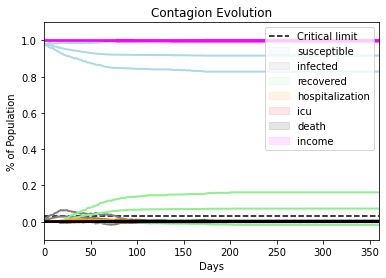

In [13]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong4", do_print = True, 
              listeners = listeners, home_grid_height = 10, home_grid_width = 10,
                  work_height = 1, work_width =1, school_height=1, school_width=1)